# Domain threat vector hacking

## Preparation
Load libraries and data

In [185]:
import pickle
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [186]:
df = pickle.load(open("vector.DOMAINS", "rb"))

## Columns
Prepare by constructing lists containing names of apility, facebook and VirusTotal columns to bse used later.

In [187]:
# Construct lists of column names
apility_cols = [v for v in df.columns if v.startswith("apility.")]
facebook_cols = [v for v in df.columns if v.startswith("facebook.")]
vt_cols = [v for v in df.columns if v.startswith("vt.")]

In [188]:
# Create scores by summing the columns.
df["apility"] = df[apility_cols].sum(axis=1)
df["facebook"] = df[facebook_cols].sum(axis=1)
df["vt"] = df[vt_cols].sum(axis=1)

## Aggregating probabilities

Aggregate device scores by computing the min, max, mean scores grouped by device.

In [192]:
# Aggregate device scores by computing the min, max, mean scores grouped by device

def my_agg(x):
    names = {
        'apility min': x['apility'].min(),
        'apility max': x['apility'].max(),
        'apility mean': x['apility'].mean(),
        'facebook min': x['facebook'].min(),
        'facebook max': x['facebook'].max(),
        'facebook mean': x['facebook'].mean(),
        'vt min': x['vt'].min(),
        'vt max': x['vt'].max(),
        'vt mean': x['vt'].mean()
    }
    
    return pd.Series(names, index=['apility min', 'apility max', 'apility mean',
                                   'facebook min', 'facebook max', 'facebook mean',
                                   'vt min', 'vt max', 'vt mean'])

agg = df.groupby("device").apply(my_agg)
agg["score"] = agg["apility max"] + agg["facebook max"] + agg["vt max"]
agg = agg.sort_values("score", ascending=False)
agg

,apility min,apility max,apility mean,facebook min,facebook max,facebook mean,vt min,vt max,vt mean,score
device,,,,,,,,,,
essential-cb,0.0,0.099220,0.000151,0.0,0.437559,0.001597,0.0,0.728479,0.002208,1.265257
terrestrial-mac,0.0,0.049610,0.000088,0.0,0.486176,0.002027,0.0,0.728478,0.001880,1.264264
misskitty-mac,0.0,0.049610,0.000052,0.0,0.452445,0.001447,0.0,0.728481,0.001080,1.230536
dramatic-mac,0.0,0.099220,0.000229,0.0,0.219807,0.000850,0.0,0.728479,0.001860,1.047505
nervings-cb,0.0,0.198439,0.000456,0.0,0.040178,0.000552,0.0,0.726670,0.001910,0.965287
minesweepers-mac,0.0,0.004100,0.000027,0.0,0.219807,0.000738,0.0,0.728481,0.001835,0.952388
serotinal-mac,0.0,0.004100,0.000040,0.0,0.219807,0.000636,0.0,0.726670,0.001107,0.950576
simon-macpro,0.0,0.099220,0.000359,0.0,0.437559,0.001441,0.0,0.111553,0.000603,0.648331
tirasse-mac,0.0,0.004100,0.000053,0.0,0.486176,0.002238,0.0,0.111553,0.001180,0.601829


### Bar chart

Don't see a strong correlation between the scores from different threat exchanges.

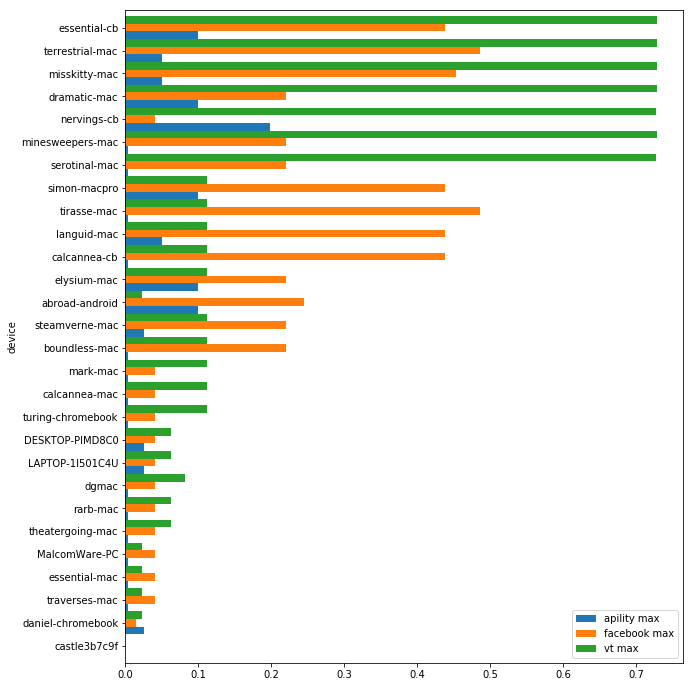

In [193]:
plt.figure()
agg = agg.sort_values("score", ascending=True)
agg[["apility max", "facebook max", "vt max"]].plot(kind="barh", figsize=(10, 12), width=1, fontsize=10)
plt.show()

## Aggregating - 2

In [194]:
# Probability aggregation function
prob_agg = lambda a: 1.0 - np.prod([1.0 - v for v in a])

### All columns

In [195]:
dfs = df[apility_cols + facebook_cols + vt_cols]
dfs = dfs.copy()
dfs["score"] = dfs.apply(prob_agg, axis=1)

In [196]:
df_dev = dfs[dfs["score"] > 0.0][["score"]].groupby("device").apply(lambda x: prob_agg(x.values)).to_frame()
df_dev.columns = ["score"]
df_dev.sort_values(by="score", ascending=False)

,score
device,
terrestrial-mac,0.998323
misskitty-mac,0.994804
essential-cb,0.971697
dramatic-mac,0.955886
minesweepers-mac,0.934026
serotinal-mac,0.841596
nervings-cb,0.828023
languid-mac,0.803539
simon-macpro,0.795468


In [197]:
df_dom = dfs[dfs["score"] > 0.0][["score"]].groupby("domain").apply(lambda x: prob_agg(x.values)).to_frame()
df_dom.columns = ["score"]
df_dom.sort_values(by="score", ascending=False)

,score
domain,
goo.gl,0.989968
bit.ly,0.974268
affec.tv,0.862716
t.co,0.850658
yahoo.com,0.744886
github.com,0.734750
ow.ly,0.694941
icloud.com,0.614059
apple.com,0.600190


### Apility

In [198]:
dfs = df[apility_cols]
dfs = dfs.copy()
dfs["score"] = dfs.apply(prob_agg, axis=1)

In [199]:
df_dev = dfs[dfs["score"] > 0.0][["score"]].groupby("device").apply(lambda x: prob_agg(x.values)).to_frame()
df_dev.columns = ["score"]
df_dev.sort_values(by="score", ascending=False)

,score
device,
nervings-cb,0.247185
dramatic-mac,0.218529
simon-macpro,0.198312
elysium-mac,0.170637
abroad-android,0.132108
terrestrial-mac,0.125451
essential-cb,0.124500
languid-mac,0.113656
misskitty-mac,0.094799


### Facebook

In [200]:
dfs = df[facebook_cols]
dfs = dfs.copy()
dfs["score"] = dfs.apply(prob_agg, axis=1)

In [201]:
df_dev = dfs[dfs["score"] > 0.0][["score"]].groupby("device").apply(lambda x: prob_agg(x.values)).to_frame()
df_dev.columns = ["score"]
df_dev.sort_values(by="score", ascending=False)

,score
device,
terrestrial-mac,0.968120
misskitty-mac,0.954865
essential-cb,0.788047
languid-mac,0.676438
simon-macpro,0.633877
boundless-mac,0.630564
dramatic-mac,0.603319
tirasse-mac,0.571110
calcannea-cb,0.550683


### VirusTotal

In [202]:
dfs = df[vt_cols]
dfs = dfs.copy()
dfs["score"] = dfs.apply(prob_agg, axis=1)

In [203]:
df_dev = dfs[dfs["score"] > 0.0][["score"]].groupby("device").apply(lambda x: prob_agg(x.values)).to_frame()
df_dev.columns = ["score"]
df_dev.sort_values(by="score", ascending=False)

,score
device,
terrestrial-mac,0.939849
misskitty-mac,0.872832
dramatic-mac,0.857694
minesweepers-mac,0.849954
essential-cb,0.847475
nervings-cb,0.681232
serotinal-mac,0.675227
boundless-mac,0.403379
elysium-mac,0.380150


### Bar chart

In [206]:
dfs = df.copy()
dfs["apility score"] = dfs[apility_cols].apply(prob_agg, axis=1)
dfs["facebook score"] = dfs[facebook_cols].apply(prob_agg, axis=1)
dfs["vt score"] = dfs[vt_cols].apply(prob_agg, axis=1)

In [207]:
grouped = dfs[["apility score", "facebook score", "vt score"]].groupby("device")
agg = grouped.agg(
    {
        "apility score": prob_agg, "facebook score": prob_agg, "vt score": prob_agg
    }
)
agg["score"] = agg["apility score"] + agg["facebook score"] + agg["vt score"]
agg

,apility score,facebook score,vt score,score
device,,,,
DESKTOP-PIMD8C0,0.044395,0.215506,0.179662,0.439563
LAPTOP-1I501C4U,0.044395,0.215506,0.179662,0.439563
MalcomWare-PC,0.008183,0.110530,0.063514,0.182227
abroad-android,0.132108,0.301480,0.075954,0.509542
boundless-mac,0.031767,0.630564,0.403379,1.065711
calcannea-cb,0.015724,0.550683,0.267896,0.834303
calcannea-mac,0.019760,0.089339,0.228773,0.337871
castle3b7c9f,0.000000,0.000000,0.000000,0.000000
daniel-chromebook,0.028562,0.022497,0.052564,0.103623


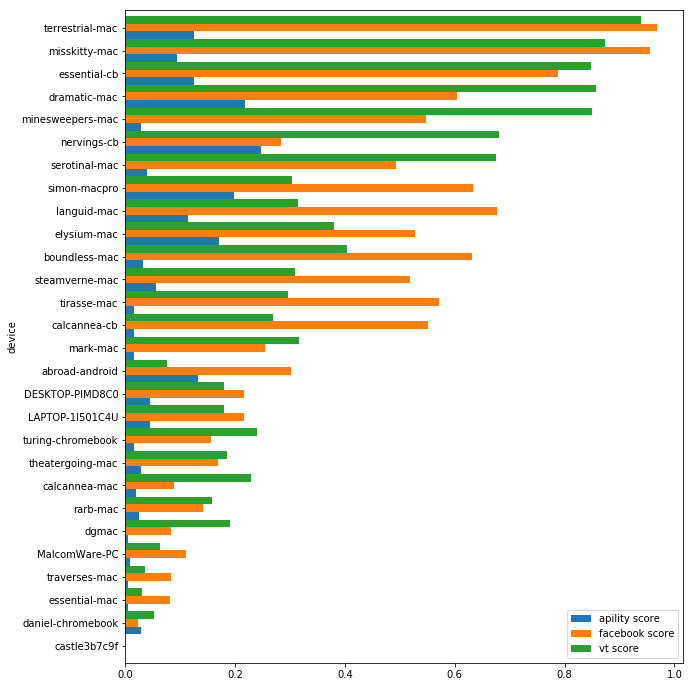

In [171]:
plt.figure()
agg = agg.sort_values("score", ascending=True)
agg[["apility score", "facebook score", "vt score"]].plot(kind="barh", figsize=(10, 12), width=1, fontsize=10)
plt.show()

Seeing a bit more correlation between Facebook and VirusTotal scores, which looks interesting.